<a href="https://colab.research.google.com/github/ciencias-da-terra-python-1-2022-1/atividade-05/blob/main/ctp1_2022_1_atividade_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://www.cnrd.info/files/2016/01/logo_geociencias_uff-250x87.jpg" alt="drawing" style="width:200px;"/>
<img src="https://ppgdot.sipos.com.br/interface/images/logo-programa-colorido.png" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 05 - Análise de Dados Raster



Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE`.

---

## About the 2013 Colorado Floods

The data that you will use for this assignment is the same data that you used in the last assignment. Use: `et.data.get_data("colorado-flood")` to download the data if you do not already have it.

Using the data from the directory as follows:

In the `colorado-flood/spatial/boulder-leehill-rd/` you will see two directories - pre and post flood. each of these directories contains a lidar sub directory that has a DTM and a DSM.tif file. You will use these files to create your lidar CHM.


For all of the plots below, be sure to do the following:
* State the source of each dataset that you use to create the plot either as a plot label or in a caption below the plot
* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels!
* Analyze / interpret what each plot shows in a markdown cell in your notebook. State what the source of the data are and what the plot shows as a driver or impact of the 2013 flood events.
* Clearly document that steps that you took to process the data by commenting your code
* Use clean coding practices - this includes comments, variable names that are informative, clean code spacing, following PEP 8 Python code style guide.
* Make sure all of the libraries that you use in the report are listed in a code cell at the TOP of your Notebook.
* Spell check your Notebook before submitting it.
* Include a markdown cell for each histogram that briefly describes how you selected the classification values used in the raster plots referencing the histograms of the data that you create.



### Write Up
In your notebook, create markdown cells below each raster plot that describes what your classification map shows about changes in the landscape before and after the flood.

Be sure to spell check and proof your text before submitting!


### DATA

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/16371473).

You can download the data from earthpy using the following syntax:

`et.data.get_data("colorado-flood")`

## PLOT 1: pre/post CHM difference raster histogram

Create a cropped raster map that shows positive and negative change in the canopy height model before and after the flood. To do this:

* Subtract the pre-flood CHM from the post-flood CHM (post_flood_CHM - pre_flood_CHM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp`crop_extent shapefile.

NOTE: I am asking you to subtract the pre-conditions from the post conditions to ensure that your negative values  represent loss of terrain. This will be easier for you to explain in your writeup!

IMPORTANT:
* Name your difference CHM object: `diff_chm_crop`.
* Set your bin values to 30 for your plot.


In [1]:
# RUN - no questions asked!
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  3177k      0 --:--:-- --:--:-- --:--:-- 3177k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [2]:
# Import libraries here - be sure to only list packaged used in this assignment

# YOUR CODE HERE
!pip install geopandas
!pip install rioxarray
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request

# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [ ]:
#paths
#pre flood
path_pre_flood_dsm = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif'
path_pre_flood_dtm = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
#post flood
path_post_flood_dsm = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif'
path_post_flood_dtm = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'

In [ ]:
# In this cell, create the difference CHM & DTM objects - it should be a numpy array.
# IMPORTANT: Name this object diff_chm_crop
# YOUR CODE HERE
#load the dsm and dtm pre fload
pre_flood_dsm = rxr.open_rasterio(path_pre_flood_dsm, masked = True).squeeze()
pre_flood_dtm = rxr.open_rasterio(path_pre_flood_dtm, masked = True).squeeze()
#checking the resolutions and bounds
if pre_flood_dsm.rio.bounds() == pre_flood_dtm.rio.bounds() and pre_flood_dsm.rio.resolution() == pre_flood_dtm.rio.resolution():
  print('The spatial extent and resolution pre flood  is the same')
else:
  print('to check')

#Now it is possible to calculate the CHM pre flood
pre_chm = pre_flood_dsm - pre_flood_dtm

#load the dsm and dtm post fload
post_flood_dsm = rxr.open_rasterio(path_post_flood_dsm, masked = True).squeeze()
post_flood_dtm = rxr.open_rasterio(path_post_flood_dtm, masked = True).squeeze()
#checking the resolutions and bounds
if post_flood_dsm.rio.bounds() == post_flood_dtm.rio.bounds() and post_flood_dsm.rio.resolution() == post_flood_dtm.rio.resolution():
  print('The spatial extent and resolution post flood  is the same')
else:
  print('to check')

#Now it is possible to calculate the CHM pre flood
post_chm = post_flood_dsm - post_flood_dtm

The spatial extent and resolution pre flood  is the same
The spatial extent and resolution post flood  is the same


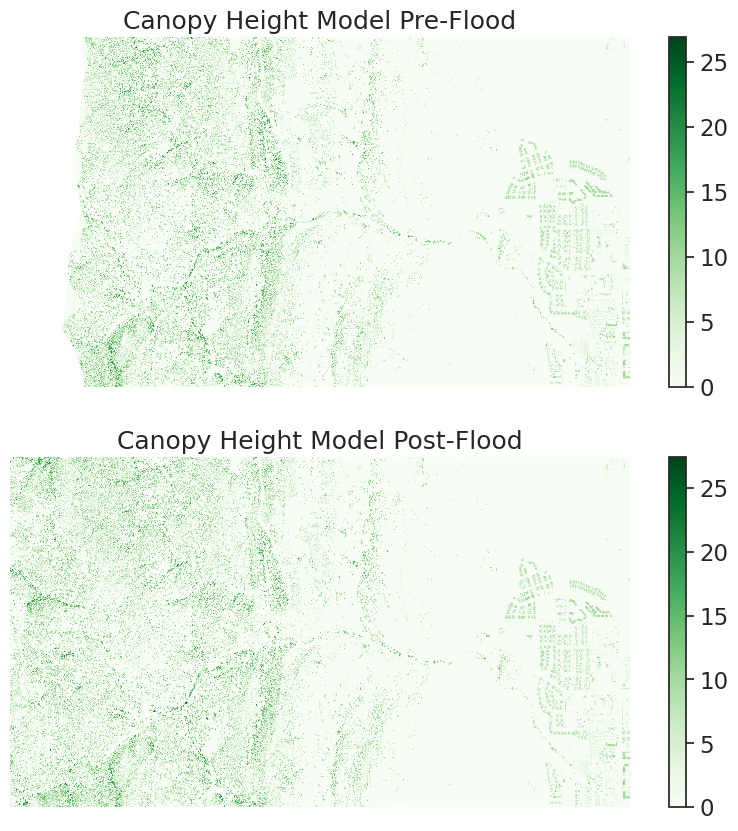

In [ ]:
# Plot the pre_chm  and post_chm

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

pre_chm.plot(ax=ax1, cmap = "Greens")
ax1.set_title("Canopy Height Model Pre-Flood")
ax1.set_axis_off()

post_chm.plot(ax=ax2, cmap = "Greens")
ax2.set_title("Canopy Height Model Post-Flood")
ax2.set_axis_off()
plt.show()


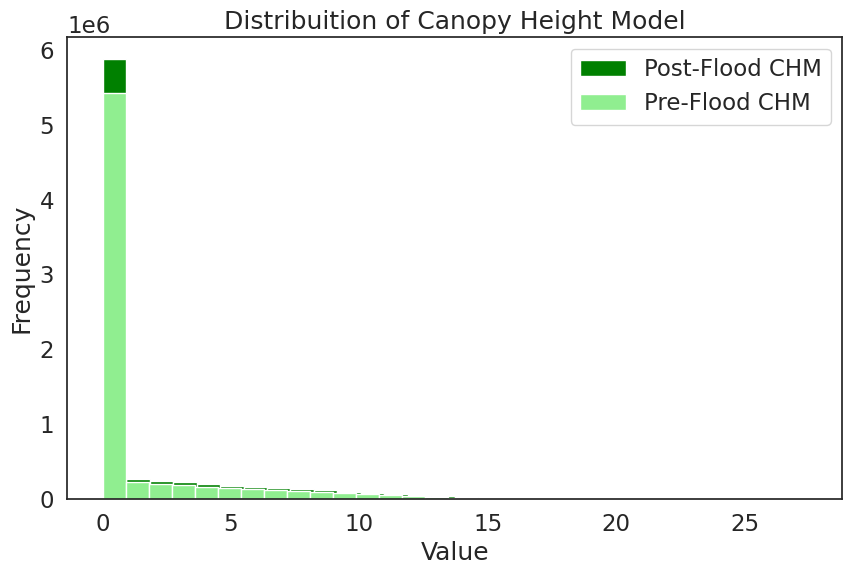

In [ ]:
# view the both hist
plt.figure(figsize=(10, 6))
plt.hist(post_chm.values.flatten(), bins=30, color='green', label='Post-Flood CHM')
plt.hist(pre_chm.values.flatten(), bins=30, color='lightgreen', label='Pre-Flood CHM')

#title, axis and legend
plt.title('Distribuition of Canopy Height Model')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

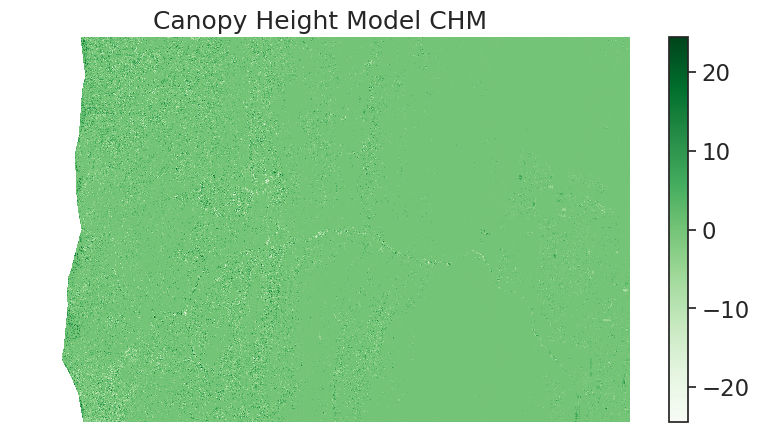

In [ ]:
#subtracting the pre-flood CHM from the post-flood CHM (post_flood_CHM - pre_flood_CHM).
diff_chm = post_chm - pre_chm
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
diff_chm.plot(cmap = "Greens")

ax.set(title="Canopy Height Model CHM")
ax.set_axis_off()
plt.show()

is the same crs, can cut it


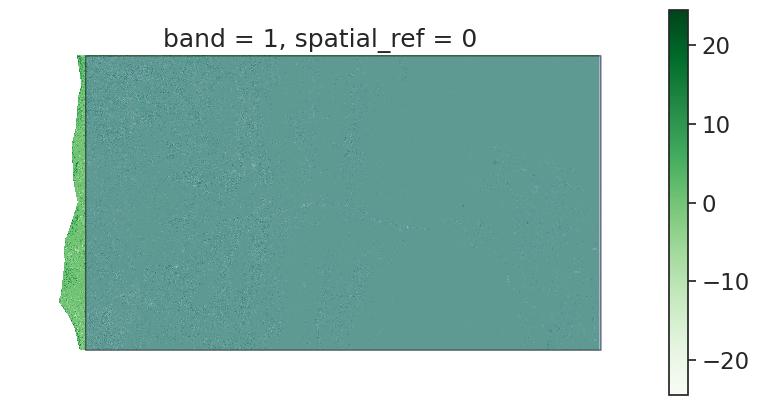

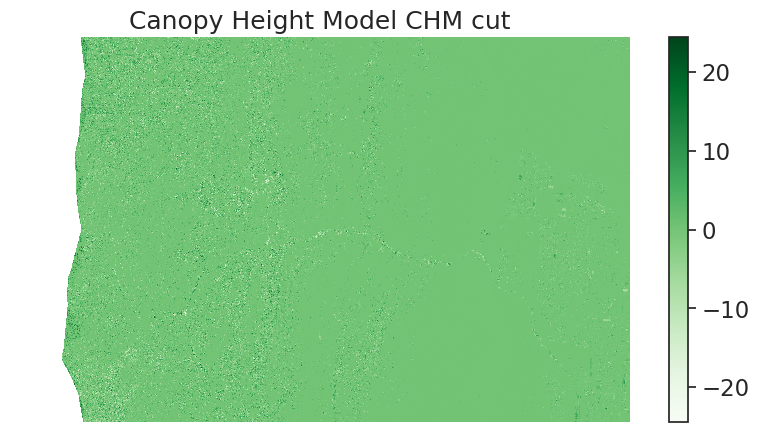

In [ ]:
from shapely.geometry import mapping
import geopandas as gpd

#croping the data  using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp`crop_extent shapefile
path_limit = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp'
limit= gpd.read_file(path_limit)
#checking if the limit and diff_chm layers have the same CRS

if limit.crs == diff_chm.rio.crs:
  print('is the same crs, can cut it')
else:
  print('check')


#view both layares
f, ax = plt.subplots(figsize=(10, 5))

diff_chm.plot.imshow(ax=ax,
                     cmap = "Greens")
limit.plot(ax=ax,
           alpha=0.5,
          edgecolor='black')

ax.set_axis_off()
plt.show()
#cut it the diff_chm with limit
diff_chm_crop = diff_chm.rio.clip(limit.geometry.apply(mapping),limit.crs)

#view the diff_chm_crop

f, ax = plt.subplots(figsize=(10, 5))

diff_chm_crop.plot.imshow(ax=ax,
                     cmap = "Greens")
ax.set(title="Canopy Height Model CHM cut")
ax.set_axis_off()
plt.show()


## Plot 1: Histogram of the cropped data

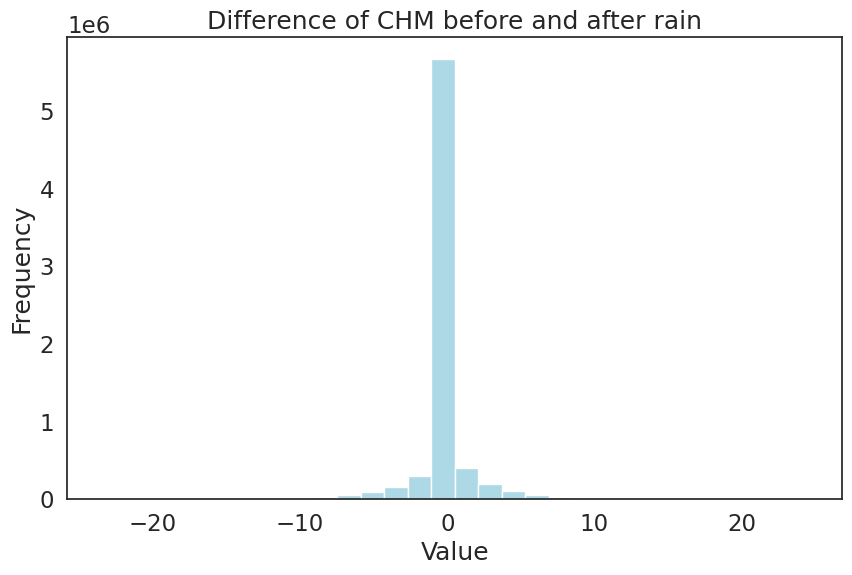

In [ ]:
# IMPORTANT: Do not use plt.show in this cell. Add your code to produce plot 1 here
# YOUR CODE HERE
# view the hist of CHM after cUT
plt.figure(figsize=(10, 6))
plt.hist(diff_chm.values.flatten(), bins=30, color='lightblue')
#title, axis and legend
plt.title('Difference of CHM before and after rain')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


## What does the histogram show you?
Answer the following questions:

1. What do each bar in the histogram plot above represent?
- _Cada barra representa a contagem dos valores das alturas da arvores (com base na relacao altura após inundação - altura antes inundação) dentro de cada intervalo._
2. What does this histogram tell you about differences in the CHM and in the landscape before vs after the flood?
- *O histograma permite interpretar que apos uma iundação houve áreas com aumento no nivel topografico DTM associado a processo de deposição de sedimento e áreas com rebaixamento do DTM, provavelmente associado a processos erosivos. Sendo assim os valores de CHM negativos podem ser interpretado como locais com maior acumulo de sedimentos, equanto que os valores com CHM positivo podem estar associados a locais com maiores taxa de deposicao de sedimentos.*
3. What is the source of the data that you used to create this plot?

- *A fonte de dados do pacote  Colorado Flood.  é oriunda do **EarthPy Data Subset** disponivel em* https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html.



YOUR ANSWER HERE

## Plot 2: Classified pre/post CHM difference raster

In the cell below, create a plot of the classified the lidar Canopy Height Model raster that you used to create the histogram above.

Use the following bins to classify your data:

* `< -1`
* `between -1 and 1`
* `> 1`

Compare your output plotted raster with your histogram.

Add a legend to your plot with the following categories:

* Loss
* No Change
* Gain

These categories should map to the bins that you used to classified the data

CHM min value: -23.429932
CHM max value: 24.45996


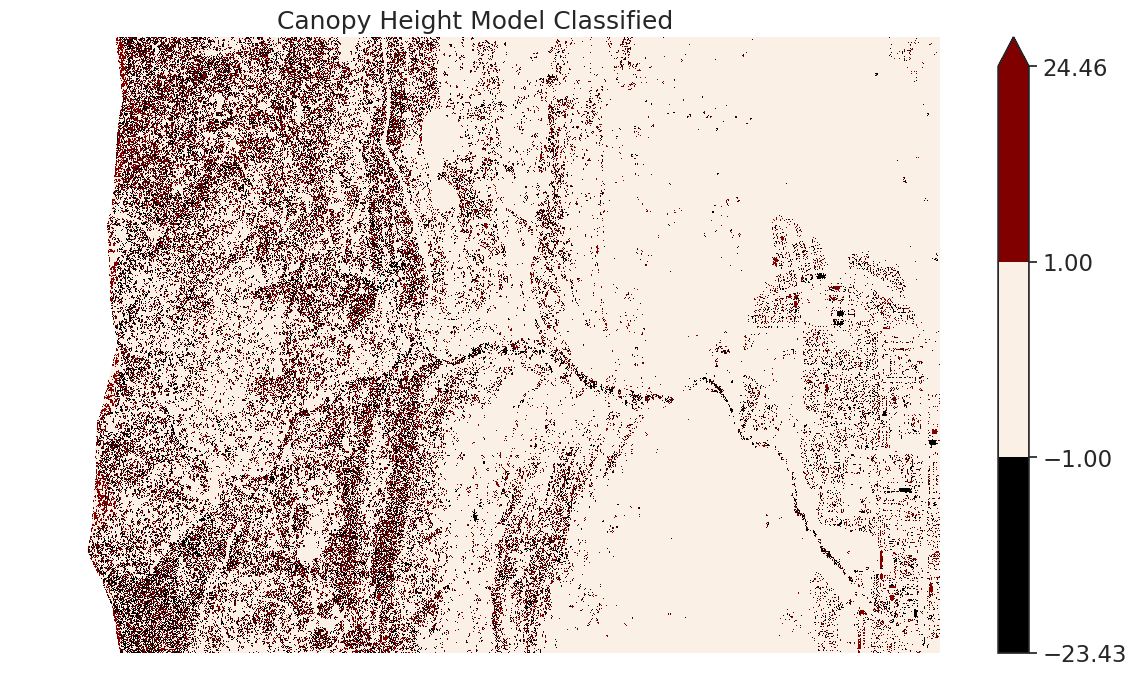

In [ ]:
# IMPORTANT: Name your classified raster object diff_chm_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import earthpy.plot as ep
import xarray as xr

#checking the min and max values
print('CHM min value:', np.nanmin(diff_chm))
print('CHM max value:', np.nanmax(diff_chm))

#defining the class of  bins
class_bins = [-23.429932, -1, 1, 24.45996]
#defining the colors
colors = ["black", "linen", "green", "maroon"]
#creating the map of colors based on the list colors
cmap = ListedColormap(colors)
#creating the color limit based on the class_bins and the colors listed in colors
norm = BoundaryNorm(class_bins, len(colors))

#creating a list of labels to use for your legend
height_class_labels = ["loss",
                       "no change",
                       "gain"]

#ploting the diff_chm  classified
f, ax = plt.subplots(figsize=(15, 8))
diff_chm.plot.imshow(cmap = cmap,
                      norm = norm)

ax.set(title="Canopy Height Model Classified")
ax.set_axis_off()
plt.show()

[1 2 3 4]


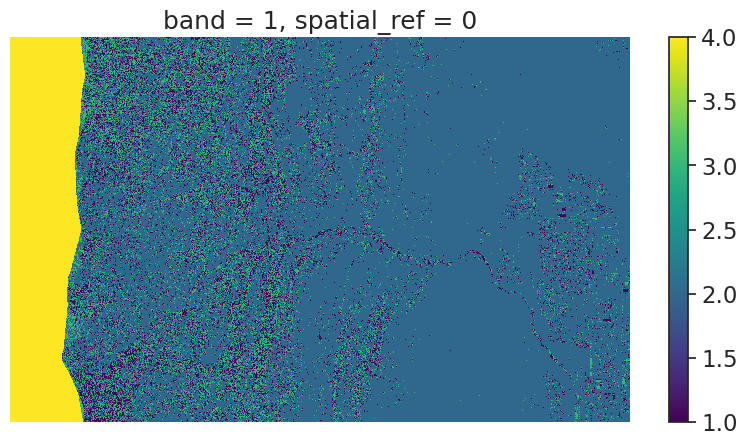

In [ ]:
#puting the legend
#creating the classes
class_bins = class_bins = [-np.inf, -1, 1, np.inf]
diff_chm_class = xr.apply_ufunc(np.digitize,
                                     diff_chm,
                                     class_bins)
print(np.unique(diff_chm_class))


#ploting the diff_chm_class
f, ax = plt.subplots(figsize=(10,5))

diff_chm_class.plot.imshow()

ax.set_axis_off()
plt.show()

[ 1.  2.  3. nan]


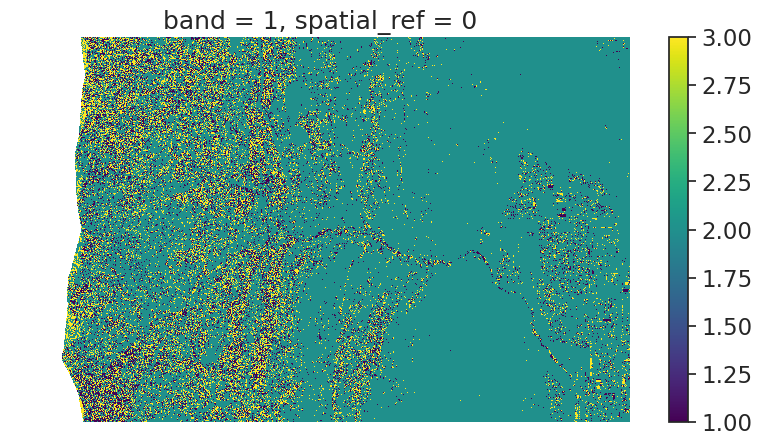

In [ ]:
#removing values > 3
diff_chm_class_ma = diff_chm_class.where(diff_chm_class != 4)
print(np.unique(diff_chm_class_ma))
f, ax = plt.subplots(figsize=(10,5))

diff_chm_class_ma.plot.imshow()

ax.set_axis_off()
plt.show()

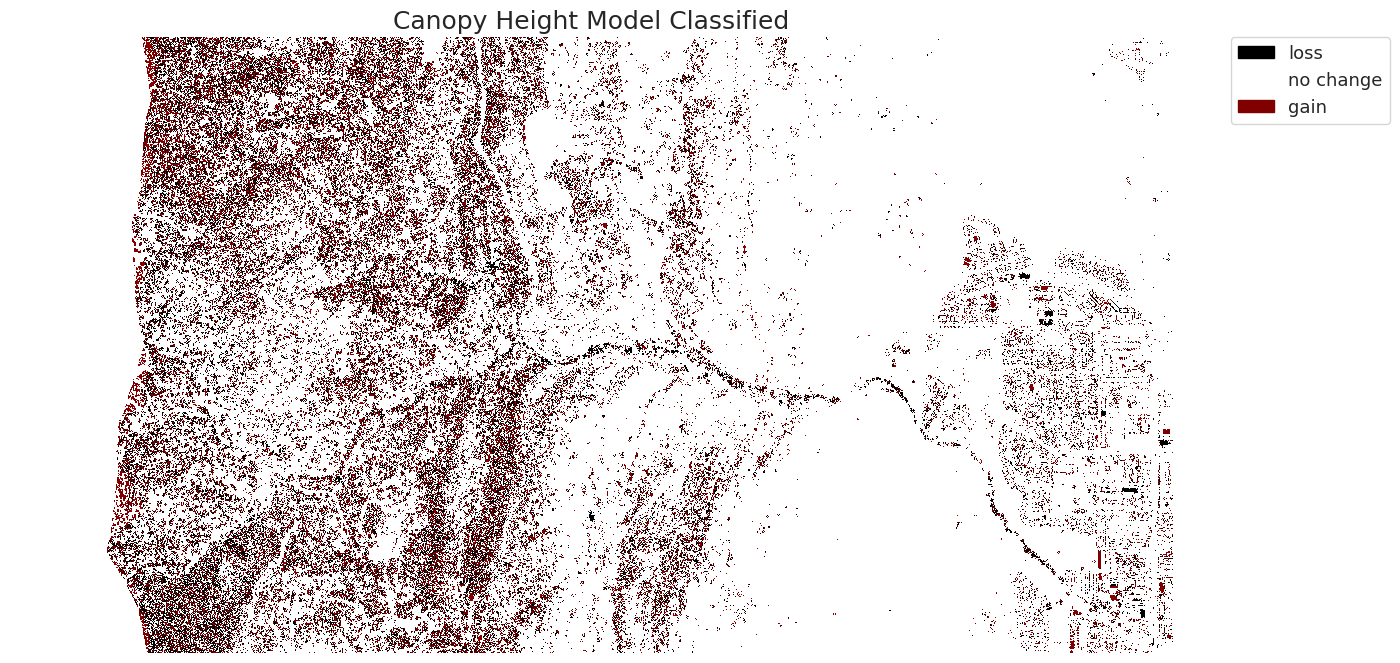

In [ ]:
#defining the class of  bins
class_bins = [0.5, 1.5, 2.5, 3.5]
#defining the colors
#colors = ["black", "white", "green"]
colors = ["black", "white", "maroon"]
#creating the map of colors based on the list colors
cmap = ListedColormap(colors)
#creating the color limit based on the class_bins and the colors listed in colors
norm = BoundaryNorm(class_bins, len(colors))

#creating a list of labels to use for your legend
height_class_labels = ["loss",
                       "no change",
                       "gain"]

#ploting the diff_chm_class
f, ax = plt.subplots(figsize=(15, 8))
im = diff_chm_class_ma.plot.imshow(cmap = cmap,
                      norm = norm,
                      add_colorbar = False)
# Add legend using earthpy
ep.draw_legend(im,
               titles = height_class_labels)

ax.set(title="Canopy Height Model Classified")
ax.set_axis_off()
plt.show()

## Plot 3: pre/post DTM Difference Raster Histogram

Create a cropped raster map that shows positive and negative change in the digital terrain model before and after the flood. To do this:

* Subtract the pre-flood DTM from the post-flood DTM (post_flood_DTM - pre_flood_DTM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp` crop_extent shapefile.

Plot a histogram of the cropped pre/post DTM data that you created above. Set your bin number to 30 and be sure to label the x and y axis with appropriate units!

The spatial extent and resolution pre flood  is the same


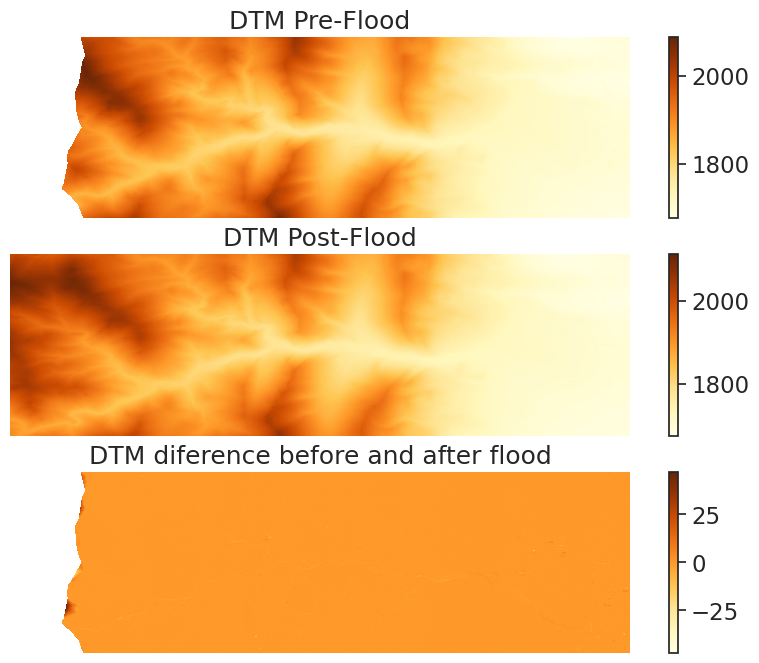

In [7]:
# IMPORTANT: Do not use plt.show in this cell. Add your code for plot 4 here

# YOUR CODE HERE
#paths
#pre flood
path_pre_flood_dtm_2 = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
#post flood
path_post_flood_dtm_2 = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'

#load dtm's
post_flood_dtm = rxr.open_rasterio(path_post_flood_dtm_2, masked = True).squeeze()
pre_flood_dtm = rxr.open_rasterio(path_pre_flood_dtm_2, masked = True).squeeze()
#checking the resolutions and bounds
if post_flood_dtm.rio.bounds() == pre_flood_dtm.rio.bounds() and post_flood_dtm.rio.resolution() == pre_flood_dtm.rio.resolution():
  print('The spatial extent and resolution pre flood  is the same')
else:
  print('to check')

#Now it is possible to calculate the difference dtm
diff_dtm = post_flood_dtm - pre_flood_dtm

# Plot the pre_dtm and post_cdtm and diff_dtm

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 8))

pre_flood_dtm.plot(ax=ax1, cmap = "YlOrBr")
ax1.set_title("DTM Pre-Flood")
ax1.set_axis_off()


post_flood_dtm.plot(ax=ax2, cmap = "YlOrBr")
ax2.set_title("DTM Post-Flood")
ax2.set_axis_off()


diff_dtm.plot(ax=ax3, cmap = "YlOrBr")
ax3.set_title("DTM diference before and after flood")
ax3.set_axis_off()
plt.show()


In [8]:
print('diff_dtm minimum value: ', np.min(diff_dtm))
print('diff_dtm max value: ', np.max(diff_dtm))

diff_dtm minimum value:  <xarray.DataArray ()>
array(-19.609985, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
diff_dtm max value:  <xarray.DataArray ()>
array(47.100098, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0


is the same crs, can cut it


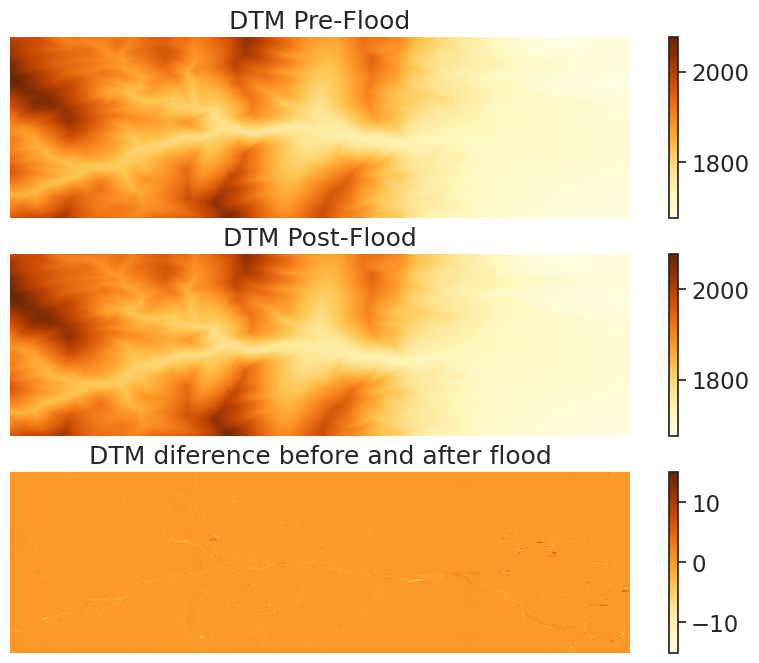

In [9]:
from shapely.geometry import mapping
import geopandas as gpd
#croping the rester's post_flood_dtm and pre_flood_dtm  using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp`crop_extent shapefile
path_limit = '/content/drive/MyDrive/python_1/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp'
limit= gpd.read_file(path_limit)
#checking if the limit and diff_chm layers have the same CRS

if limit.crs == post_flood_dtm.rio.crs == pre_flood_dtm.rio.crs:
  print('is the same crs, can cut it')
else:
  print('check')

#cut the raster's with limit
post_flood_dtm_crop = post_flood_dtm.rio.clip(limit.geometry.apply(mapping),limit.crs)
pre_flood_dtm_crop = pre_flood_dtm.rio.clip(limit.geometry.apply(mapping),limit.crs)

#Now it is possible to calculate the difference dtm with raster's cropeed
diff_dtm_2 = post_flood_dtm_crop - pre_flood_dtm_crop

# ploting the pre_dtm_crop and post_dtm_crop and diff_dtm_crop

fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 8))

pre_flood_dtm_crop.plot(ax=ax1, cmap = "YlOrBr")
ax1.set_title("DTM Pre-Flood")
ax1.set_axis_off()


post_flood_dtm_crop.plot(ax=ax2, cmap = "YlOrBr")
ax2.set_title("DTM Post-Flood")
ax2.set_axis_off()


diff_dtm_2.plot(ax=ax3, cmap = "YlOrBr")
ax3.set_title("DTM diference before and after flood")
ax3.set_axis_off()
plt.show()

diff_dtm minimum value:  <xarray.DataArray ()>
array(-10.530029, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
diff_dtm max value:  <xarray.DataArray ()>
array(15.099976, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0


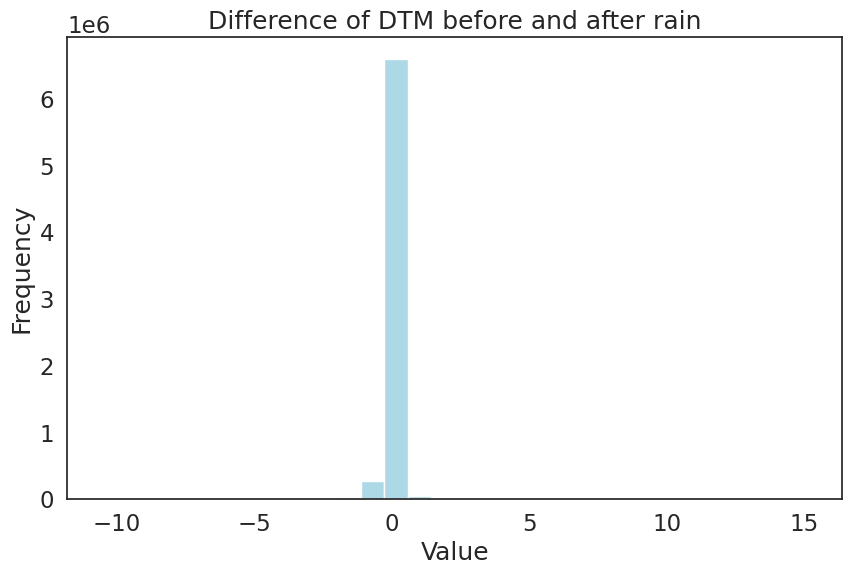

In [12]:
print('diff_dtm minimum value: ', np.min(diff_dtm_2))
print('diff_dtm max value: ', np.max(diff_dtm_2))

# view the hist diff_dtm_2
plt.figure(figsize=(10, 6))
plt.hist(diff_dtm_2.values.flatten(), bins=30, color='lightblue')
#title, axis and legend
plt.title('Difference of DTM before and after rain')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### Plot 4: pre/post DTM difference raster

Reclassify your difference DTM using the following range values:

* `< -1`
* `between -1 and 1`
* `> 1`

Plot your difference DTM raster using matplotlib.
Create a legend for your plot that has 3 categories:

* Loss
* No Change
* Gain

Each category should represent one of the "bins" that you used when you classified your data.

CHM min value: -10.530029
CHM max value: 15.099976


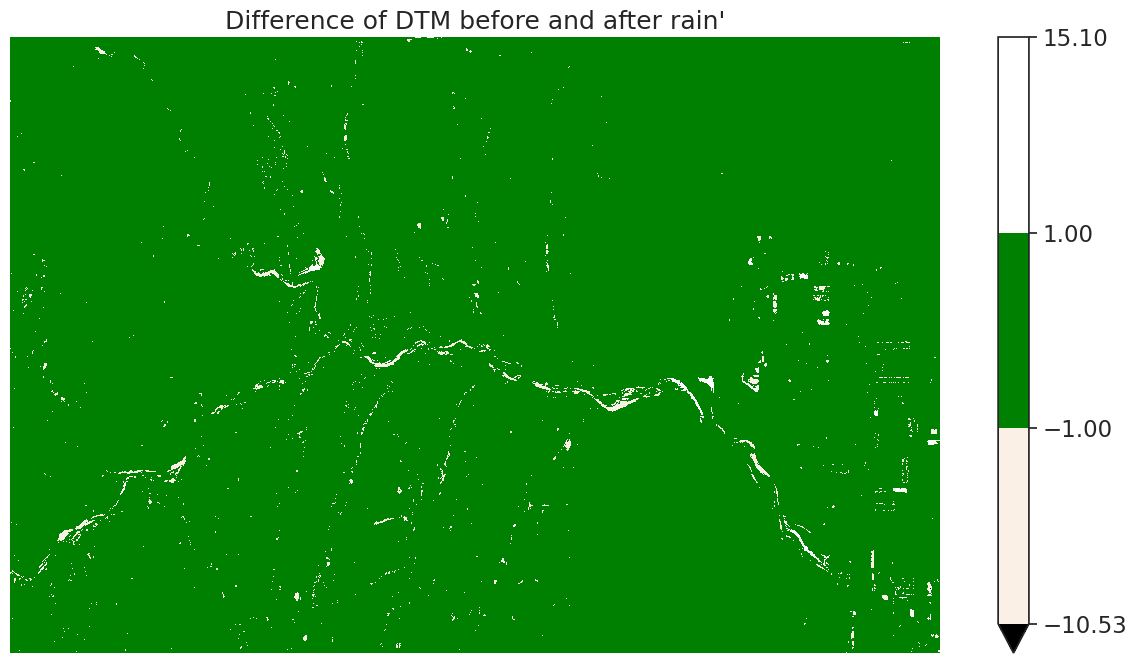

In [13]:
# IMPORTANT: Name your classified raster object diff_dtm_crop_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE
# YOUR CODE HERE
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import earthpy.plot as ep
import xarray as xr

#checking the min and max values
print('CHM min value:', np.nanmin(diff_dtm_2))
print('CHM max value:', np.nanmax(diff_dtm_2))

#defining the class of  bins
class_bins = [-10.530029, -1, 1, 15.099976]
#defining the colors
colors = ["black", "linen", "green", "maroon"]
#creating the map of colors based on the list colors
cmap = ListedColormap(colors)
#creating the color limit based on the class_bins and the colors listed in colors
norm = BoundaryNorm(class_bins, len(colors))

#creating a list of labels to use for your legend
height_class_labels = ["loss",
                       "no change",
                       "gain"]

#ploting the diff_dtm_2  classified
f, ax = plt.subplots(figsize=(15, 8))
diff_dtm_2.plot.imshow(cmap = cmap,
                      norm = norm)

ax.set(title="Difference of DTM before and after rain")
ax.set_axis_off()
plt.show()

[1 2 3]


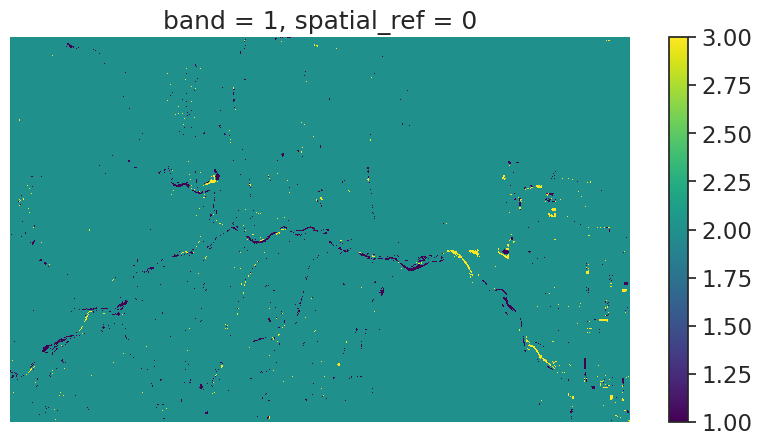

In [14]:
#puting the legend
#creating the classes
class_bins = class_bins = [-np.inf, -1, 1, np.inf]
diff_dtm_2_class = xr.apply_ufunc(np.digitize,
                                     diff_dtm_2,
                                     class_bins)
print(np.unique(diff_dtm_2_class))


#ploting the diff_chm_class
f, ax = plt.subplots(figsize=(10,5))

diff_dtm_2_class.plot.imshow()

ax.set_axis_off()
plt.show()


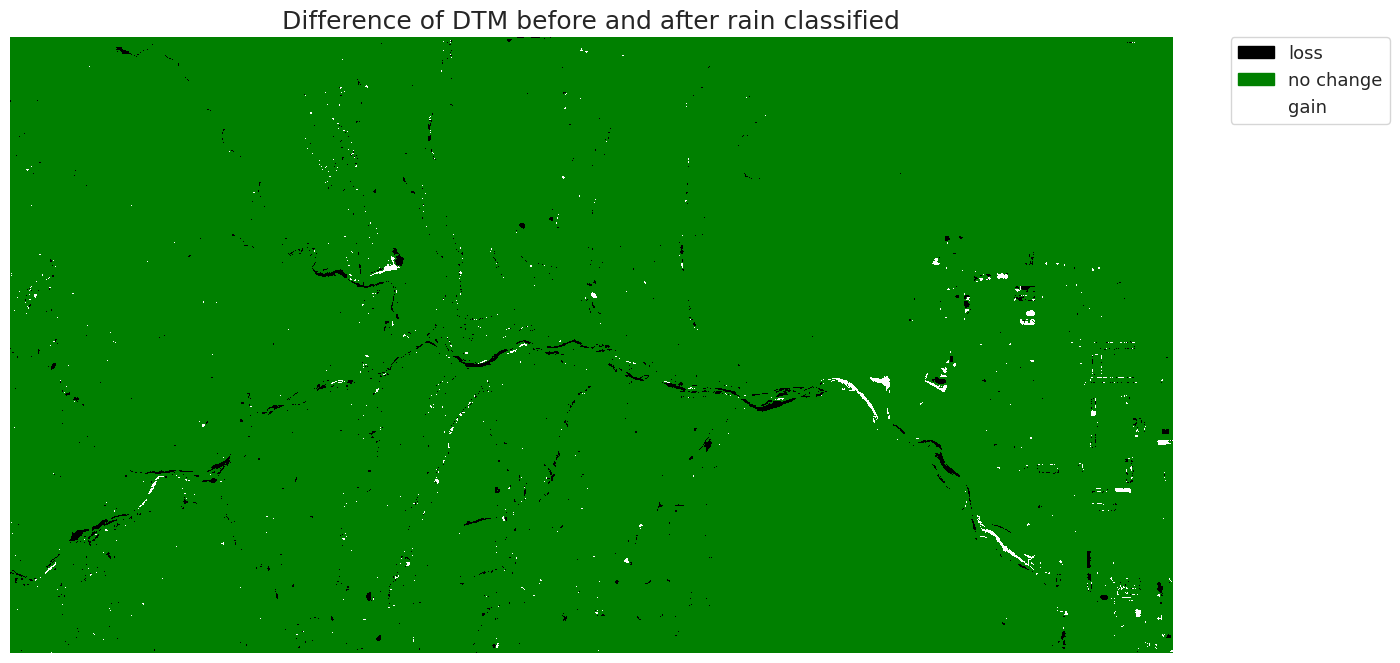

In [16]:
#defining the class of  bins
class_bins = [0.5, 1.5, 2.5, 3.5]
#defining the colors

colors = ["black", "linen", "green", "maroon"]
#creating the map of colors based on the list colors
cmap = ListedColormap(colors)
#creating the color limit based on the class_bins and the colors listed in colors
norm = BoundaryNorm(class_bins, len(colors))

#creating a list of labels to use for your legend
height_class_labels = ["loss",
                       "no change",
                       "gain"]

#ploting the diff_chm_class
f, ax = plt.subplots(figsize=(15, 8))
im = diff_dtm_2_class.plot.imshow(cmap = cmap,
                      norm = norm,
                      add_colorbar = False)
# Add legend using earthpy
ep.draw_legend(im,
               titles = height_class_labels)

ax.set(title="Difference of DTM before and after rain classified")
ax.set_axis_off()
plt.show()

##  Question

* Look at the CHM plot and compare it to the DTM difference plot that you created above
* Consider how the data were collected, what they show and how they were processed? What factors could impact and add uncertainty to the CHM difference map?

Add your answer below using markdown

YOUR ANSWER HERE